## Morgan Lind

## Final Project

05-09-2025

### Project Questions: 
- What is the predominant demographic group in the three Los Angeles communities with the highest recorded crime rates?
- How have crime rates across neighborhoods in Los Angeles changed between January - March 2024 and October - December 2024?
-  ‘Are there specific communities where crimes involving child victims are more prevalent, and what are the annual trends?’

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


### Libraries for Descriptive Stats

In [2]:
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import statsmodels.api as sm



### Libraries for Machine Learning 

In [3]:
import sklearn
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Libraries for Text Analytics

In [4]:
from wordcloud import WordCloud, STOPWORDS

Prep data for analysis

In [5]:
# import the csv of merged data as dataframe 

crime_rates = pd.read_csv('crime_population_merged.csv', encoding = 'utf-8', sep=',', low_memory=False)

crime_rates.head(10)

,DR_NO,DATE_RPTD,DATE_OCC,AREA,AREA_NAME,RPT_DIST_NO,CRM_CD,CRM_CD_DESC,MOCODES,VICT_AGE,...,LOCATION,American Indian and Alaska Native,Asian,African American,Native Hawaiian and Other Pacific Islander,White,Some Other Race,Two or More Races,Hispanic or Latino,Total Population
0,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,1300 N FRIES AV,1689,19777,14606,669,35988,42779,35622,123570,274700
1,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,BERTH 73,1689,19777,14606,669,35988,42779,35622,123570,274700
2,250304275,2025-03-13,2025-03-13,3,Southwest,338,510,VEHICLE - STOLEN,Unknown,X,...,3100 MCCLINTOCK AV,8949,13176,135099,755,38986,212898,103916,371954,885733
3,251000503,2025-03-13,2025-03-13,10,West Valley,1035,624,BATTERY - SIMPLE ASSAULT,0913 1815 1251 0400 0416,16,...,18200 KITTRIDGE ST,4482,68900,30270,729,285533,128171,103957,250663,872705
4,251700501,2025-03-13,2025-03-13,17,Devonshire,1717,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0340 0359 1822 1259,16,...,11200 GOTHIC AV,1938,41598,10827,321,80569,28667,26983,60021,250924
5,251904204,2025-03-12,2025-03-12,19,Mission,1916,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1402,15,...,13000 BORDEN AV,3009,23418,6825,463,27206,91464,37909,155550,345844
6,252104142,2025-03-12,2025-03-12,21,Topanga,2169,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1501,24,...,6200 WINNETKA AV,0,10,0,0,65,0,0,0,75
7,251904205,2025-03-12,2025-03-12,19,Mission,1916,624,BATTERY - SIMPLE ASSAULT,0344,16,...,13000 BORDEN AV,3009,23418,6825,463,27206,91464,37909,155550,345844
8,250404153,2025-03-12,2025-03-12,4,Hollenbeck,479,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443 0400,11,...,700 S INDIANA ST,3238,15172,2941,251,8813,86114,23709,130232,270470
9,252104143,2025-03-12,2025-03-12,21,Topanga,2169,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1501,51,...,6200 WINNETKA AV,0,10,0,0,65,0,0,0,75


In [6]:
# drop duplicate records for DR_NO (code that identifies incident)
crime_rates = crime_rates[~crime_rates['DR_NO'].duplicated()]

In [7]:
# convert 'DATE_OCC' column to datetime format and set unconvertible values to NaN
crime_rates['DATE_OCC'] = pd.to_datetime(crime_rates['DATE_OCC'], errors='coerce')

In [8]:
# extract year and month from 'DATE_OCC' and store in new columns 'Year' and 'Month'
crime_rates['Year'] = crime_rates['DATE_OCC'].dt.year
crime_rates['Month'] = crime_rates['DATE_OCC'].dt.month

In [9]:
# drop columns that are unnecessary for analysis
crime_rates = crime_rates.drop(['DATE_RPTD', 'CRM_CD','AREA','RPT_DIST_NO', 
                                'MOCODES','CRM_CD', 'PREMIS_CD', 'WEAPON_USED_CD','STATUS','STATUS_DESC',  
                                'Some Other Race', 'Two or More Races' ], axis=1)



In [10]:
# check the size of dataframe 
crime_rates.shape

(121046, 19)

In [11]:
# check the data types
crime_rates.dtypes

DR_NO                                                  int64
DATE_OCC                                      datetime64[ns]
AREA_NAME                                             object
CRM_CD_DESC                                           object
VICT_AGE                                              object
VICT_SEX                                              object
VICT_DESCENT                                          object
PREMIS_DESC                                           object
WEAPON_DESC                                           object
LOCATION                                              object
American Indian and Alaska Native                      int64
Asian                                                  int64
African American                                       int64
Native Hawaiian and Other Pacific Islander             int64
White                                                  int64
Hispanic or Latino                                     int64
Total Population        

In [12]:
# create a list with all demographic columns used to group the data
demographics = ['American Indian and Alaska Native','Asian', 'African American',
                    'Native Hawaiian and Other Pacific Islander', 'White', 'Hispanic or Latino']

In [13]:
# convert population number data to proportions using a for loop
for dem in demographics:
    crime_rates[dem + ' (Proportion)'] = crime_rates[dem] / crime_rates['Total Population']

In [14]:
# check updated dataframe
crime_rates.head()

,DR_NO,DATE_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,PREMIS_DESC,WEAPON_DESC,LOCATION,...,Hispanic or Latino,Total Population,Year,Month,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
0,250504239,2025-03-13,Harbor,VEHICLE - STOLEN,X,X,X,PARKING LOT,Unknown / None Used,1300 N FRIES AV,...,123570,274700,2025,3,0.006149,0.071995,0.053171,0.002435,0.131008,0.449836
1,250504238,2025-03-13,Harbor,THEFT PLAIN - PETTY ($950 & UNDER),X,X,X,STREET,Unknown / None Used,BERTH 73,...,123570,274700,2025,3,0.006149,0.071995,0.053171,0.002435,0.131008,0.449836
2,250304275,2025-03-13,Southwest,VEHICLE - STOLEN,X,X,X,STREET,Unknown / None Used,3100 MCCLINTOCK AV,...,371954,885733,2025,3,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
3,251000503,2025-03-13,West Valley,BATTERY - SIMPLE ASSAULT,16,M,H,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",18200 KITTRIDGE ST,...,250663,872705,2025,3,0.005136,0.078950,0.034685,0.000835,0.327182,0.287225
4,251700501,2025-03-13,Devonshire,CRIMINAL THREATS - NO WEAPON DISPLAYED,16,M,H,STREET,VERBAL THREAT,11200 GOTHIC AV,...,60021,250924,2025,3,0.007723,0.165779,0.043149,0.001279,0.321089,0.239200


In [15]:
# drop the population number data ethnicity_group columns 
crime_rates = crime_rates.drop(['American Indian and Alaska Native', 'Asian', 'African American',
                                'Native Hawaiian and Other Pacific Islander', 'White', 'Hispanic or Latino', 'Total Population'], axis=1)

In [16]:
# Make sure appropriate columns were dropped
crime_rates.columns

Index(['DR_NO', 'DATE_OCC', 'AREA_NAME', 'CRM_CD_DESC', 'VICT_AGE', 'VICT_SEX',
       'VICT_DESCENT', 'PREMIS_DESC', 'WEAPON_DESC', 'LOCATION', 'Year',
       'Month', 'American Indian and Alaska Native (Proportion)',
       'Asian (Proportion)', 'African American (Proportion)',
       'Native Hawaiian and Other Pacific Islander (Proportion)',
       'White (Proportion)', 'Hispanic or Latino (Proportion)'],
      dtype='object')

In [17]:
# save these changes to a csv file
crime_rates.to_csv('analysis_crime_data.csv', index=False)

##### Find the total population of each community

In [18]:
# Create the population DataFrame by selecting 'AREA_NAME' and population proportion columns
population_df = crime_rates[['AREA_NAME', 
                             'American Indian and Alaska Native (Proportion)', 
                             'Asian (Proportion)', 
                             'African American (Proportion)', 
                             'Native Hawaiian and Other Pacific Islander (Proportion)',
                             'White (Proportion)', 
                             'Hispanic or Latino (Proportion)']]

population_df

,AREA_NAME,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
0,Harbor,0.006149,0.071995,0.053171,0.002435,0.131008,0.449836
1,Harbor,0.006149,0.071995,0.053171,0.002435,0.131008,0.449836
2,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
3,West Valley,0.005136,0.078950,0.034685,0.000835,0.327182,0.287225
4,Devonshire,0.007723,0.165779,0.043149,0.001279,0.321089,0.239200
...,...,...,...,...,...,...,...
121041,Newton,0.004261,0.094342,0.387192,0.000000,0.079664,0.202415
121042,Wilshire,0.009155,0.176829,0.075461,0.000642,0.189368,0.284302
121043,Northeast,0.017711,0.122784,0.012434,0.000155,0.190048,0.347558
121044,Harbor,0.006149,0.071995,0.053171,0.002435,0.131008,0.449836


In [19]:
# save population_df to a csv file
population_df.to_csv('population.csv', index=False)

### Question 1: 
- What is the predominant demographic group in the three Los Angeles communities with the highest recorded crime rates?

In [20]:
# calculate summary statistics using .describe() for the count of 'DR_NO' grouped by each area 'AREA_NAME' 
descriptive_stats = crime_rates.groupby("AREA_NAME")["DR_NO"].describe()

print(descriptive_stats)

               count          mean           std          min           25%  \
AREA_NAME                                                                     
Central      10217.0  2.401310e+08  4.196392e+05  240100001.0  2.401082e+08   
Devonshire    5901.0  2.417513e+08  6.493343e+05  240906494.0  2.417064e+08   
Foothill      3954.0  2.416331e+08  5.021726e+05  241512058.0  2.416059e+08   
Harbor        5363.0  2.406462e+08  1.165238e+06  240500001.0  2.405061e+08   
Hollenbeck    4321.0  2.404450e+08  6.056148e+05  240305279.0  2.404057e+08   
Hollywood     6153.0  2.406592e+08  7.077655e+05  240106465.0  2.406065e+08   
Mission       5380.0  2.419495e+08  6.379382e+05  241900001.0  2.419063e+08   
N Hollywood   7250.0  2.415304e+08  4.542853e+05  240912846.0  2.415068e+08   
Newton        5394.0  2.413306e+08  5.050422e+05  231305396.0  2.413063e+08   
Northeast     5258.0  2.411463e+08  6.153772e+05  241100503.0  2.411060e+08   
Olympic       5772.0  2.420250e+08  4.089473e+05  24

<function matplotlib.pyplot.show(close=None, block=None)>

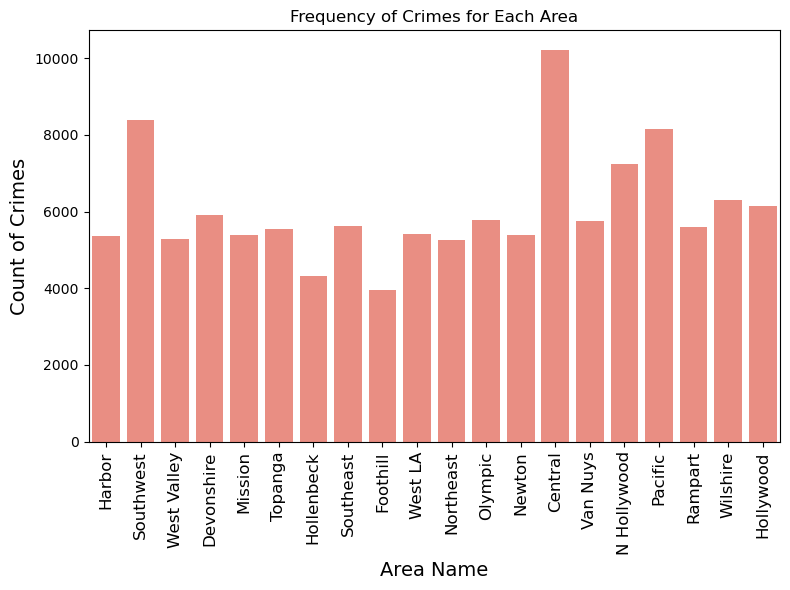

In [66]:
# create a histogram to visualize the count of crime report per area
plt.figure(figsize=(8, 6))

sns.countplot(data=crime_rates, x='AREA_NAME', color='salmon')
plt.xticks(rotation=90,fontsize=12)  
plt.title('Frequency of Crimes for Each Area')
plt.xlabel('Area Name', fontsize=14) 
plt.ylabel('Count of Crimes', fontsize=14) 
plt.tight_layout()
plt.show


In [22]:
# Group by the communities and total the number of crimes committed in each community and display the top 3 
top_communities = crime_rates.groupby('AREA_NAME')['DR_NO'].count().sort_values(ascending=False).head(3)

top_communities

AREA_NAME
Central      10217
Southwest     8379
Pacific       8165
Name: DR_NO, dtype: int64

In [23]:
avg = np.mean(top_communities)
print("Average:", round(avg))

Average: 8920


In [24]:
std_dev = np.std(top_communities)
print('Standard Deviation:', round(std_dev))

Standard Deviation: 921


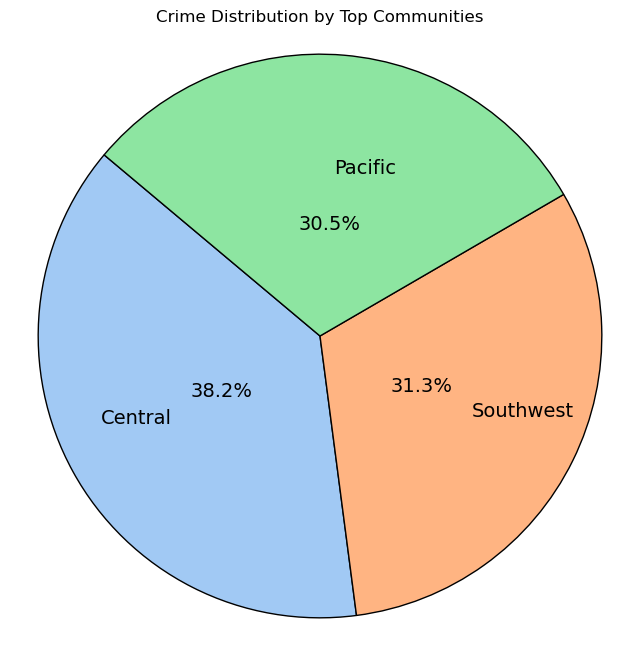

In [25]:
# create a pie chart for percentage breakdown of areas with the most crime
plt.figure(figsize=(8, 8))

plt.pie(
    top_communities,
    labels=top_communities.index,  
    # round to 1 decimal place
    autopct='%1.1f%%',
    # % label position
    pctdistance=0.4,
    startangle=140,
    colors=sns.color_palette("pastel"),
    wedgeprops={"edgecolor": "black"},
    # community label position
    labeldistance=0.6,   
    # font size of labels 
    textprops={'fontsize': 14}          
)
plt.title('Crime Distribution by Top Communities', pad=5)
plt.axis('equal')
plt.show()

#### Steps to create an effective FacetGrid

In [26]:
# return list of top 3 area names with highest count of 'DR_NO' for each 'AREA_NAME' and extract names
top_communities = crime_rates.groupby('AREA_NAME')['DR_NO'].count().sort_values(ascending=False).head(3).index.tolist()

In [27]:
# filter population_df to only include rows where 'AREA_NAME' matches top communities
filtered_population = population_df[population_df['AREA_NAME'].isin(top_communities)]
filtered_population

,AREA_NAME,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
2,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
13,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
14,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
15,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
16,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
...,...,...,...,...,...,...,...
121022,Central,0.008341,0.091937,0.063802,0.001048,0.207498,0.335874
121023,Southwest,0.010103,0.014876,0.152528,0.000852,0.044016,0.419939
121024,Central,0.008341,0.091937,0.063802,0.001048,0.207498,0.335874
121028,Central,0.008341,0.091937,0.063802,0.001048,0.207498,0.335874


In [28]:
# reshape to long format, where ethnic group proportion = rows, and new columns for demographic group names and each proportion  
melted_population = filtered_population.melt(
    id_vars='AREA_NAME',
    value_vars=[
        'American Indian and Alaska Native (Proportion)', 
        'Asian (Proportion)', 
        'African American (Proportion)', 
        'Native Hawaiian and Other Pacific Islander (Proportion)', 
        'White (Proportion)', 
        'Hispanic or Latino (Proportion)'
    ],
    var_name='Demographics',
    value_name='Proportion of Population'
)

In [29]:
# remove the string " (Proportion)" 
melted_population['Demographics'] = melted_population['Demographics'].str.replace(' \(Proportion\)', '', regex=True)

/Users/morganlind/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

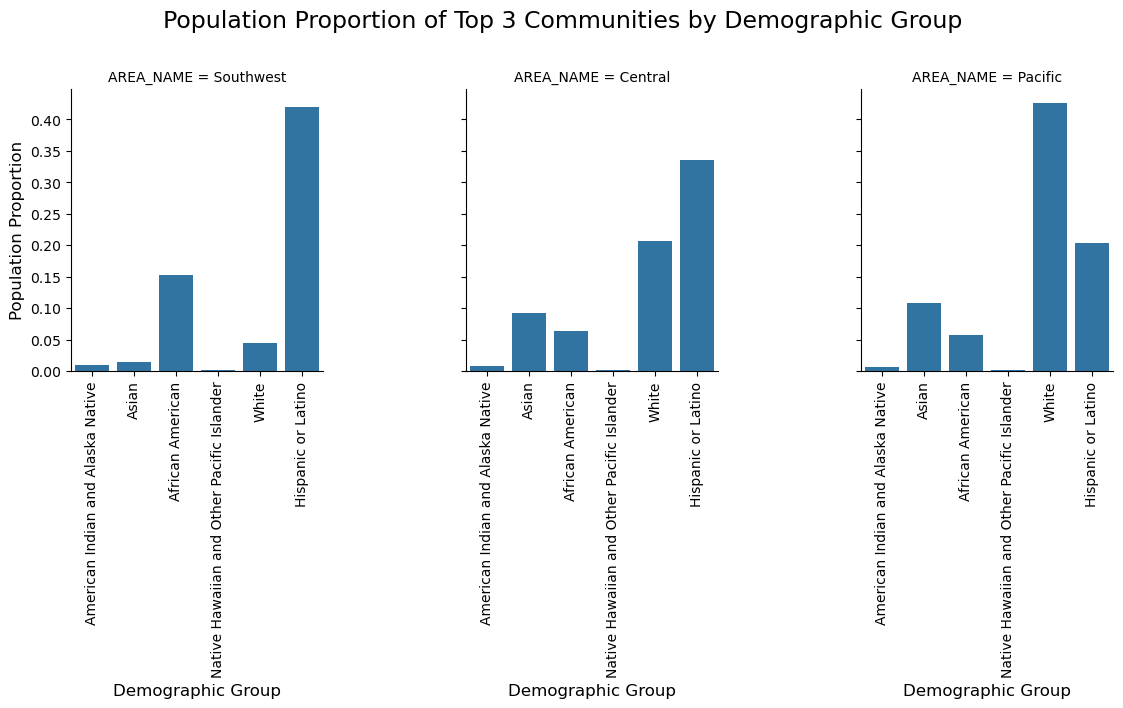

In [30]:
fig = plt.figure(constrained_layout=True)
# create a FacetGrid visualization
g = sns.FacetGrid(melted_population, col='AREA_NAME', col_wrap=3, height=4)

# Plot bar charts in each facet, x-axis = Demographic Group and y-axis = Population Proportion, 
# and order ethnic groups in same order
g.map_dataframe(sns.barplot, x='Demographics', y='Proportion of Population', order=demographics)

# Rotate x-axis labels by 90 degrees 
g.set_xticklabels(rotation=90, fontsize=10)

# Set axis labels for all plots 
g.set_axis_labels('Demographic Group', 'Population Proportion', fontsize=12)

# Add title above all subplots 
g.fig.suptitle('Population Proportion of Top 3 Communities by Demographic Group', size=17, y=1.05)

# Adjust the layout 
plt.subplots_adjust(top=0.85)


# Display the plot
plt.show()

### Question 2: 
- How have crime rates across neighborhoods in Los Angeles changed between January - March 2024 and October - December 2024?

In [31]:
# create crime_2024 by selecting rows where the year is 2024 
crime_2024 = crime_rates[crime_rates['DATE_OCC'].dt.year == 2024]

In [32]:
# create of copy of subset DataFrame
crime_2024 = crime_rates[crime_rates['DATE_OCC'].dt.year == 2024].copy()

# covert to datetime
crime_2024['DATE_OCC'] = pd.to_datetime(crime_2024['DATE_OCC'])

In [33]:
# extract the month
crime_2024['Month'] = crime_2024['DATE_OCC'].dt.month

In [34]:
# filter for first and last 3 months in 2024
crime_begin = crime_2024[crime_2024['Month'].isin([1, 2, 3])]
crime_end = crime_2024[crime_2024['Month'].isin([10, 11, 12])]

In [35]:
# count number of crimes in each area for the first three and last three months of 2024 
crime_begin_counts = crime_begin.groupby('AREA_NAME').size().reset_index(name='crime_begin_count')
crime_end_counts = crime_end.groupby('AREA_NAME').size().reset_index(name='crime_end_count')

# merge beginning and end crime counts on 'AREA_NAME' with an outer join
crime_change = pd.merge(crime_begin_counts, crime_end_counts, on='AREA_NAME', how='outer').fillna(0)


In [36]:
# calculate difference and % change in crime counts per area starting count at 1 to prevent division errors 
crime_change['difference'] = crime_change['crime_end_count'] - crime_change['crime_begin_count']
crime_change['percent_change'] = (crime_change['difference'] / crime_change['crime_begin_count'].replace(0, 1)) * 100


In [37]:
from scipy.stats import shapiro

In [38]:
# calculate crime counts difference from the end and beginning of 2024  
diffs = crime_change['difference']
# perform Shapiro-Wilk test and determine if those differences are normally distributed
stat, p = shapiro(diffs)

In [39]:
# display the results and whether they were normally or not normall distributed
print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("The difference in the data is NOT normally distributed (significant).")
else:
    print("The difference in the data is approximately normally distributed (not significant).")

Shapiro-Wilk test statistic: 0.9436832666397095, p-value: 0.28118225932121277
The difference in the data is approximately normally distributed (not significant).


In [40]:
# use k-means clustering to assign each 'AREA_NAME' to a cluster based on percent change in crime 
X = crime_change[['percent_change']]

# use 3 clusters, increase, decrease, constant
kmeans = KMeans(n_clusters=3, random_state=0)
crime_change['cluster'] = kmeans.fit_predict(X)


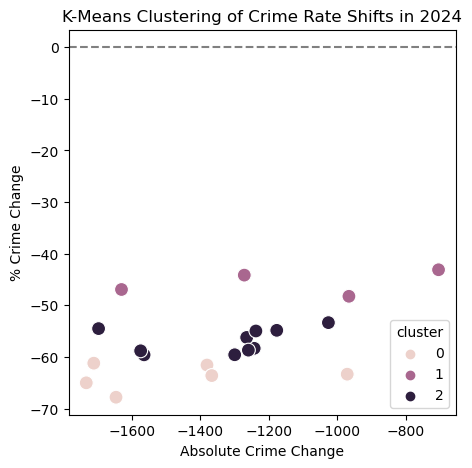

In [41]:
# create scatter plot displaying relationship between absolute and % crime change
plt.figure(figsize=(5, 5))
# colored by cluster
sns.scatterplot(data=crime_change, x='difference', y='percent_change', hue='cluster', s=100)
# horizontal line at 0 to highlight areas with no change
plt.axhline(0, color='gray', linestyle='--')
plt.title("K-Means Clustering of Crime Rate Shifts in 2024")
plt.xlabel("Absolute Crime Change")
plt.ylabel("% Crime Change")
plt.show()

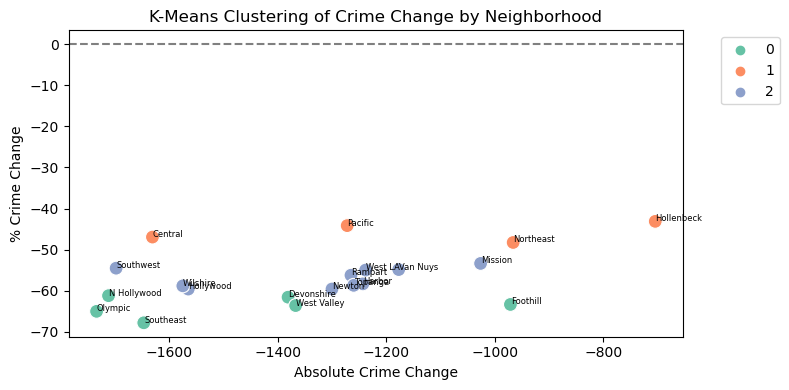

In [42]:
# For me to get a better understanding of which communities fell within clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=crime_change, 
    x='difference', 
    y='percent_change', 
    hue='cluster',
    palette='Set2',
    s=100
)

# Annotate each point with AREA_NAME
for i, row in crime_change.iterrows():
    if not pd.isna(row['AREA_NAME']):
        plt.text(row['difference'] + 0.5, row['percent_change'], str(row['AREA_NAME']), fontsize=6)

plt.axhline(0, color='gray', linestyle='--')
plt.title("K-Means Clustering of Crime Change by Neighborhood")
plt.xlabel("Absolute Crime Change")
plt.ylabel("% Crime Change")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Question 3:
Are there specific communities where crimes involving child victims are more prevalent, and what are the annual trends?

In [43]:
# replace instances of 'X' in the VICT_AGE column of the crime_rates DataFrame with NaN to mark them as missing values.
crime_rates['VICT_AGE'] = crime_rates['VICT_AGE'].replace('X', np.nan)

In [44]:
# convert to numeric values
crime_rates['VICT_AGE'] = pd.to_numeric(crime_rates['VICT_AGE'], errors='coerce')

In [45]:
# fill the missing values with the median age 
crime_rates['VICT_AGE'] = crime_rates['VICT_AGE'].fillna(crime_rates['VICT_AGE'].median())

<Axes: title={'center': 'Monthly Child Victim Crimes in 2024 by Area Name'}, xlabel='Month'>

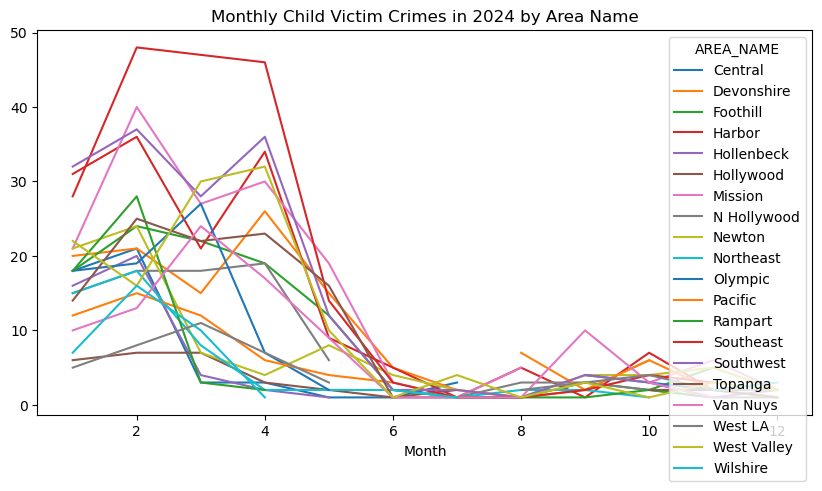

In [46]:
# convert DATE_OCC to datetime 
crime_rates['DATE_OCC'] = pd.to_datetime(crime_rates['DATE_OCC'])

# extract year from the 'DATE_OCC' column
crime_rates['Year'] = crime_rates['DATE_OCC'].dt.year

# filter for the year 2024
crime_rates_2024 = crime_rates[crime_rates['Year'] == 2024].copy()  # Make an explicit copy

# create new column for month using .loc
crime_rates_2024.loc[:, 'Month'] = crime_rates_2024['DATE_OCC'].dt.month

# filter to include child victim crimes only
monthly_child_crimes_2024 = crime_rates_2024[crime_rates_2024['VICT_AGE'] < 18].groupby(['Month', 'AREA_NAME']).size().unstack()

# plot trends over first 3 months of 2024
monthly_child_crimes_2024.plot(figsize=(10, 5), title="Monthly Child Victim Crimes in 2024 by Area Name")


<Axes: title={'center': 'Monthly Child Victim Crimes in January - March 2025 by Area Name'}, xlabel='Month'>

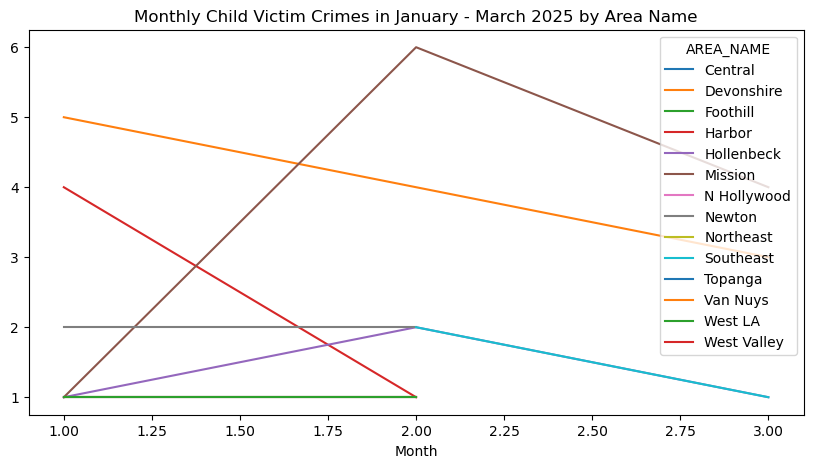

In [47]:
# convert DATE_OCC to datetime 
crime_rates['DATE_OCC'] = pd.to_datetime(crime_rates['DATE_OCC'])

# extract year from the 'DATE_OCC' column
crime_rates['Year'] = crime_rates['DATE_OCC'].dt.year

# filter for the year 2025
crime_rates_2025 = crime_rates[crime_rates['Year'] == 2025].copy()  # Make an explicit copy

# create new column for month using .loc
crime_rates_2025.loc[:, 'Month'] = crime_rates_2025['DATE_OCC'].dt.month

# filter include child victim crimes only
monthly_child_crimes_2025 = crime_rates_2025[crime_rates_2025['VICT_AGE'] < 18].groupby(['Month', 'AREA_NAME']).size().unstack()

# plot trends over first 3 months of 2025
monthly_child_crimes_2025.plot(figsize=(10,5), title="Monthly Child Victim Crimes in January - March 2025 by Area Name")


In [48]:
# creates new column 'child_victim' with Boolean values (1 = victim < 18 & 0 = victim > 18)
crime_rates['child_victim'] = (crime_rates['VICT_AGE'] < 18).astype(int)

In [49]:
# create new column with month from 'DATE_OCC' 
crime_rates['Month'] = crime_rates['DATE_OCC'].dt.month

In [50]:
# create one-hot encoded variables for 'AREA_NAME' and 'Month' and dropp first category of each 
crime_rates_encoded = pd.get_dummies(crime_rates[['AREA_NAME', 'Month']], drop_first=True)

In [51]:
# assign one-hot encoded features to X variables and & target variable y 'child_victim'
X = crime_rates_encoded  
y = crime_rates['child_victim']

In [52]:
# split x and y variable into 80/32 train /test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create random forest classifier with 100 decision trees
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# train the random forest model using .fit()
model.fit(X_train, y_train)

# predict outcomes on test data
y_pred = model.predict(X_test)

In [53]:
# display accuracy of model by comparing predicted values vs actual values 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6282940933498554


In [54]:
# display classification report to show precision, recall, f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77     23835
           1       0.03      0.73      0.06       375

    accuracy                           0.63     24210
   macro avg       0.51      0.68      0.41     24210
weighted avg       0.98      0.63      0.76     24210



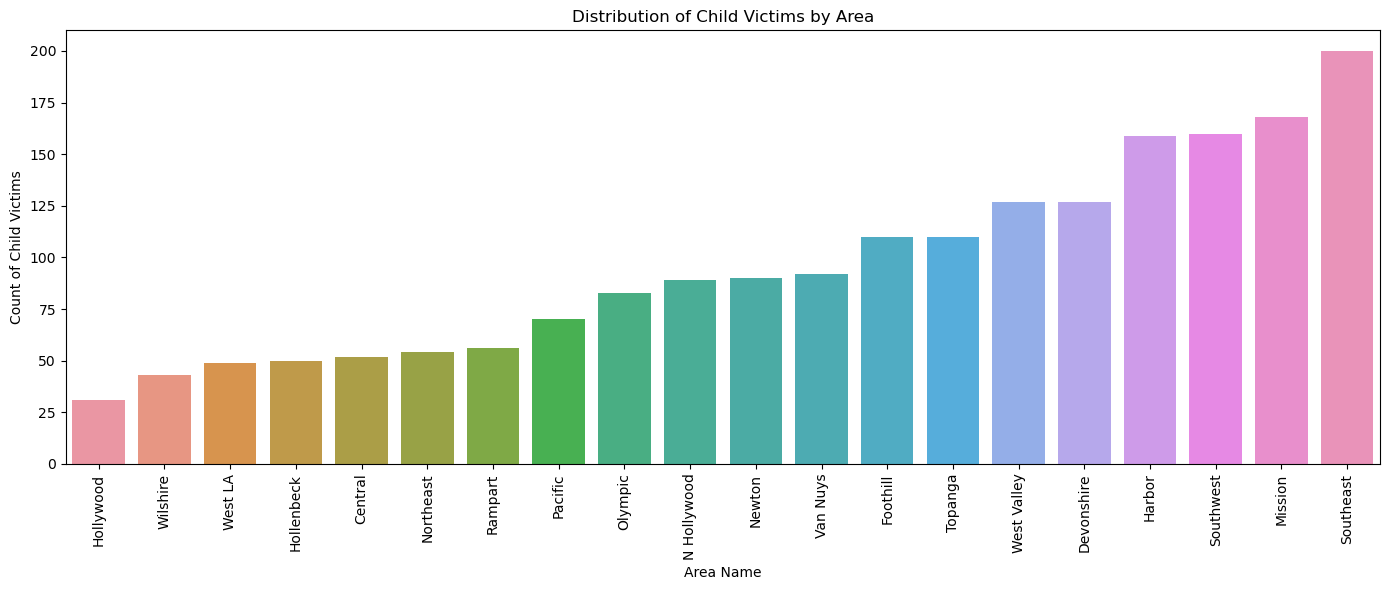

In [55]:
# filter data for child victims (age < 18)
child_victims = crime_rates[crime_rates['VICT_AGE'] < 18]

# calculate the count of child victims per area
child_victims_by_area = child_victims.groupby('AREA_NAME').size().sort_values()

# create vertical bar chart with child victim count per area
plt.figure(figsize=(14, 6))
sns.barplot(x=child_victims_by_area.index, y=child_victims_by_area.values)
plt.title("Distribution of Child Victims by Area")
plt.xlabel("Area Name")
plt.ylabel("Count of Child Victims")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [56]:
print(child_victims_by_area)

AREA_NAME
Hollywood       31
Wilshire        43
West LA         49
Hollenbeck      50
Central         52
Northeast       54
Rampart         56
Pacific         70
Olympic         83
N Hollywood     89
Newton          90
Van Nuys        92
Foothill       110
Topanga        110
West Valley    127
Devonshire     127
Harbor         159
Southwest      160
Mission        168
Southeast      200
dtype: int64


In [62]:
descent_order = child_victims['VICT_DESCENT'].value_counts().index
base_palette = sns.color_palette('pastel', len(descent_order))
color_map = dict(zip(descent_order, base_palette))

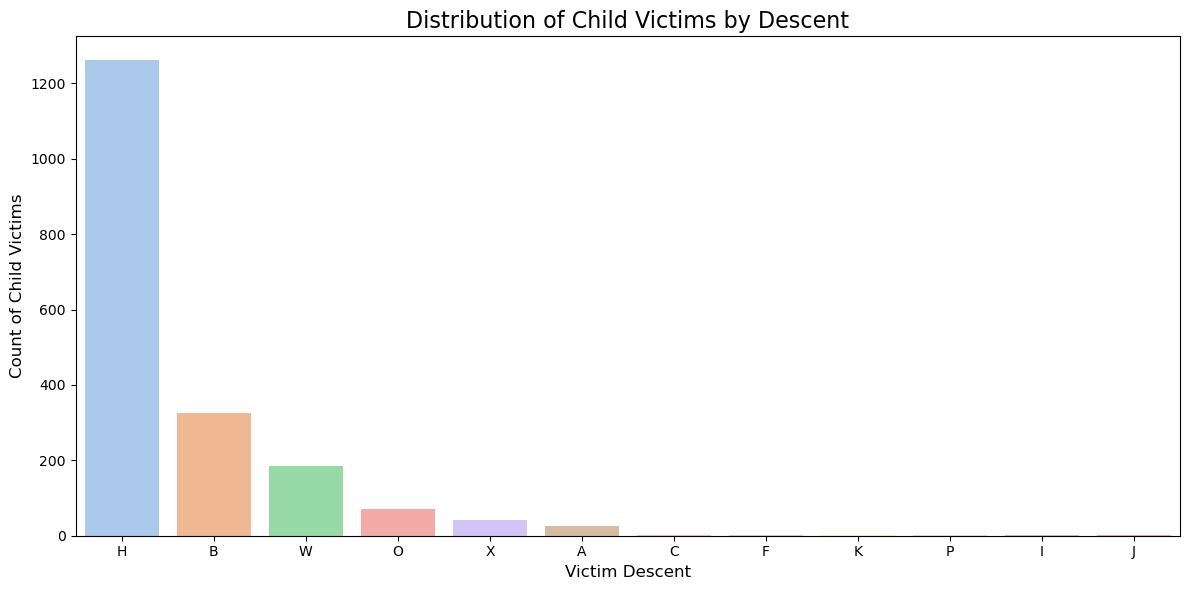

In [63]:
# Bar chart for overall descent distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=child_victims_by_descent.index,
            y=child_victims_by_descent.values,
            palette=color_map)
plt.title("Distribution of Child Victims by Descent", fontsize=16)
plt.xlabel("Victim Descent", fontsize=12)
plt.ylabel("Count of Child Victims", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/Users/morganlind/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/7v/xrwq6wg17s97dttr3lbqz7jw0000gn/T/ipykernel_48227/1691755728.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


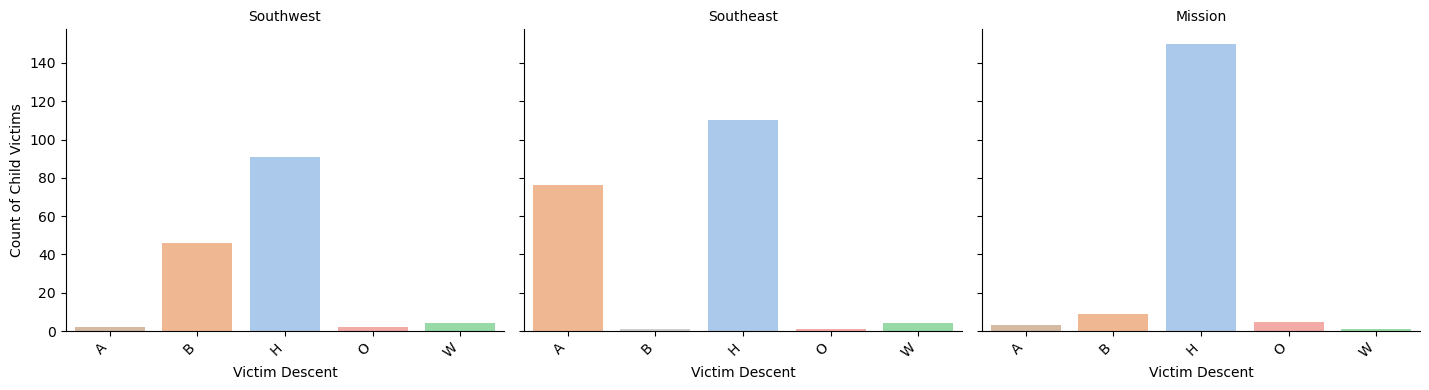

In [64]:
# FacetGrid for top neighborhoods with consistent colors
g = sns.FacetGrid(counts, col='AREA_NAME', col_order=child_areas, sharey=True, height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='VICT_DESCENT', y='Count', palette=color_map)

g.set_axis_labels('Victim Descent', 'Count of Child Victims')
g.set_titles(col_template='{col_name}')
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [61]:
crime_rates.to_csv('final_crime_rates.csv', index=False)